# Mini-projet : Population

Supposons que deux espèces coexistent au sein d'un même environnement. Disons, pour rendre plus concrètes les choses, que ce sont des **lapins** et des **renards**. On sent bien que les renards vont vouloir manger les lapins et que les lapins vont se reproduire très rapidement. Mais dans quelle mesure pouvons nous affirmer cela ? Quelles sont les équations d'évolutions du système ? Comment les espèces interagissent-elles entre elles ? C'est ce que nous allons voir. Une fois cela fait, nous allons nous demander comment et en quoi de tels modèles de population peuvent-ils être utiles pour l'étude de la conservation de manuscrits.

On commence par présenter le modèle de Lotka-Volterra. Le projet commence réellement dans la seconde partie, spécifique à l'étude des manuscrits.

Le projet initial a été réalisé par Elias Garcia--Naze (PS Maths 2025) et Mathias Garnier (PS Maths 2025). Le deuxième auteur a poursuivi l'étude au cas des manuscrits.

## Évolution des populations : système de Lotka-Volterra

Le sujet nous pousse à étudier une interaction entre les populations décrite par le système de Lotka-Volterra. Ce système peut être résumé ainsi : "*la population de lapins est naturellement croissante en l’absence de renards, mais diminue proportionnnellement au nombre de prédateurs. Au contraire, la population de renard est naturellement décroissante en
l’absence de lapins, et augmente proportionnellement en présence de proies*".

On modélise alors le système comme suit :
\begin{cases}
      x'(t) & = x(t) ( 3 - 2 y(t))\\
      y'(t) & = y(t) ( - 4 + x(t))
\end{cases}       
où $x(t)$ correspond au nombre de lapins présents à un instant $t$ et $y(t)$ au nombre de renards présents au même instant $t$.

Nous sommes face à un **système d'équations différentielles**. Nous n'avons pas été en mesure de trouver une solution analytique (et quelques recherches semblent nous indiquer que ce n'est pas possible; en revanche, en utilisant des fonctions spéciales (fonction W de Lambert), certains systèmes de calculs formels nous donnent une solution).

Les équations sont **couplées**. En ce sens, le nombre de lapin dépend du nombre de renard et inversement.

Remarquons tout d'abord que le système peut se mettre sous la forme suivante : 
\begin{cases}
      x'(t) & = F(t, x, y) \\
      y'(t) & = G(t, x, y)
\end{cases}
avec $F$ et $G$ deux fonctions de trois paramètres. Les expressions de $F$ et $G$ sont les suivantes :

In [1]:
def F(t, x, y):
    return x * (3 - 2 * y)

def G(t, x, y):
    return y * (-4 + x)

Dans la mesure où nous ne sommes pas en mesure de résoudre ce système d'équations différentielles, nous allons proposer une **résolution numérique** en discrétisant le problème afin d'approximer les solutions. Pour ce faire, utilisons dans un premier temps la **méthode d'Euler** (explicite). Commençons par expliquer son fonctionnement (nous nous sommes appuyés sur le site [femto-physique](https://femto-physique.fr/analyse-numerique/euler.php#:~:text=Simulations-,La%20m%C3%A9thode%20d'%20Euler,%C3%A0%20comprendre%20et%20%C3%A0%20programmer) pour comprendre la méthode).

## Méthode d'Euler : fonctionnement

Remarquons tout d'abord que le problème peut être ré-écrit sous une forme vectorielle. En effet, en posant :
\begin{align}
    A(t) &= \begin{bmatrix}
           x(t) \\
           y(t)
         \end{bmatrix} \text{ et } f(t, A) = \begin{bmatrix}
           F(t, x(t), y(t)) \\
           G(t, x(t), y(t))
         \end{bmatrix}.
\end{align}
On remarque que le problème est équivalent à résoudre :
\begin{equation}
A'(t) = f(t, A).
\end{equation}

Fixons enfin des conditions initiales comme suit $A(0) = \begin{bmatrix} x_0 \\ y_0 \end{bmatrix}$ (avec $x_0$ le nombre initial de lapin et $y_0$ le nombre initial de renard).

*C'est une simple réécriture qui nous simplifie les notations lors de l'explication de la méthode d'Euler.*

Si l'on intègre la relation précédemment obtenue en ayant discrétisé le temps, nous obtenons que :
\begin{align}
    \displaystyle \int_{t_n}^{t_{n+1}} A'(t) \mathrm{d}t & = \int_{t_n}^{t_{n+1}} f(t, A) \mathrm{d} t \\
    A(t_{n+1}) - A(t_n) &= \int_{t_n}^{t_{n+1}} f(t, A) \mathrm{d} t
\end{align}
où $t_i$ est un élément de la subdivision de l'intervalle de temps d'étude $[0, T[$ (avec $T > 0$).

Nous pouvons donc obtenir une relation entre un temps $t_n$ et un temps $t_{n+1}$. Si l'on peut calculer l'intégrale de droite (ou à défaut l'approximer d'une manière pas trop maladroite) nous aurons gagné en ayant trouvé un algorithme pour approximer $A(t)$ pour tout temps de l'intervalle d'étude. Sans grande originalité, nous allons utiliser la méthode des rectangles à gauche. (Nous aurions pu raffiner la méthode (trapèze, Simpson...) mais les efforts de calculs ne sont pas ici nécessaires.)

Ainsi, on approxime l'intégrale de droite comme suit :
\begin{equation}
\int_{t_n}^{t_{n+1}} f(t, A) \mathrm{d} t = h f(t_n, A(t_n))
\end{equation}
pour un pas $h$ correspondant à la précision que nous voulons.

En conclusion, nous avons la relation suivante (un processus itératif) qui va être implémenté ci-dessous :
\begin{equation}
A(t_{n+1}) = A(t_n) + h f(t_n, A(t_n))
\end{equation}

In [2]:
def euler(F, G, x0, y0, duration, n_step):
    # On définit la taille du pas.
    step = duration / n_step
    
    # Conditions initiales
    X = [x0]
    Y = [y0]
    
    t = 0
    for i in range(n_step):
        # On applique les formules trouvées ci-dessus.
        X = np.append(X, X[i] + F(t, X[i], Y[i]) * step)
        Y = np.append(Y, Y[i] + G(t, X[i], Y[i]) * step)
        t += step
    
    return X, Y

Voyons quelles solutions approchées de $x(t)$ et $y(t)$ nous obtenons pour différentes conditions initiales.

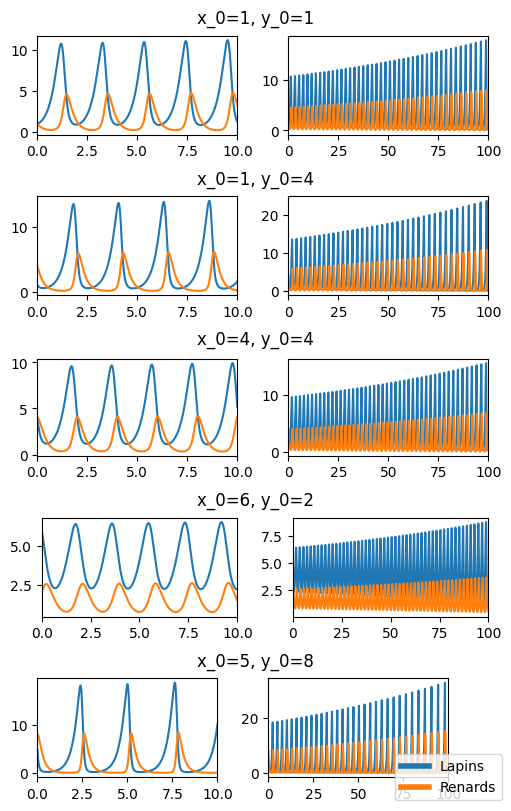

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# On utilise duration et precision pour définir la taille du pas d'approximation.
# On s'intéresse à deux échelles de temps différentes : duration1 = 10, duration2 = 100
# Un temps plus long nécessite une précision accrue car si les pas de la méthode d'Euler 
# sont trop grands, l'interpolation linéaire peut causer une erreur d'overflow.
duration1 = 10
precision1 = 10000

duration2 = 100
precision2 = 100000

# On définit une fonction afin de pouvoir afficher la solution du problème pour différentes conditions initiales.
def plot_euler(x0, y0, duration, precision, ax):
    X, Y = euler(F, G, x0, y0, duration, precision)
    
    T = np.linspace(0, duration, precision+1)
    ax.plot(T, X)
    ax.plot(T, Y)


#=============================================#
# Plots pour différentes conditions initiales #
#=============================================#
conditions_initiales = [
    (1,1),
    (1,4),
    (4,4),
    (6,2),
    (5,8)
]


fig = plt.figure(figsize=(5,8), layout='constrained') # le `constrained` est nécessaire, autrement
                                                      # nous n'obtenons pas l'affichage que nous souhaitons
subFigs = fig.subfigures(len(conditions_initiales))

for i, point in enumerate(conditions_initiales):
    subFig = subFigs[i]
    axs = subFig.subplots(1, 2)
    
    # On définit les limites du plot.
    axs[0].set_xlim(0, duration1)
    axs[1].set_xlim(0, duration2)
    
    # On trace la solution pour des conditions initiales déterminées.
    plot_euler(point[0], point[1], duration1, precision1,  axs[0])
    plot_euler(point[0], point[1], duration2, precision2,  axs[1])
    
    # On ajoute un titre.
    subFig.suptitle(r'x_0={}, y_0={}'.format(point[0], point[1]))

# Légende des graphiques
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:orange', lw=4)]

# La bbox_to_anchor permet de placer la légende où nous le souhaitons.
plt.legend(handles=custom_lines, labels=['Lapins', 'Renards'], bbox_to_anchor=(1, 0), loc='center')
plt.show()

Afin de vérifier que nous ne nous sommes pas trompés, comparons avec les résultats obtenus par un `solveur` provenant de la bibliothèque `scipy`.

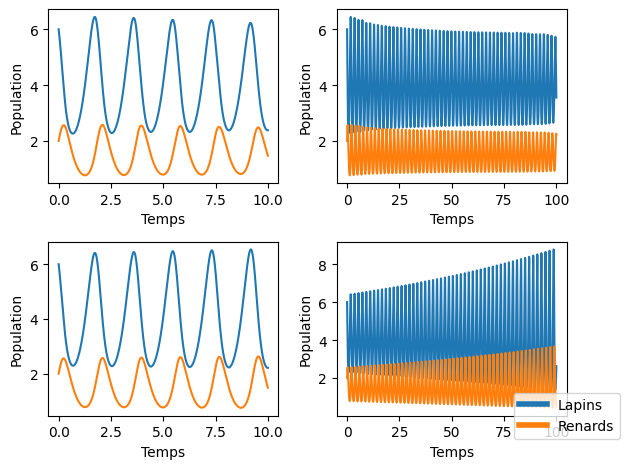

In [4]:
from scipy.integrate import solve_ivp # Schéma numérique (ivp signifie initial value problem)

fig, axs = plt.subplots(2, 2)

# On ajoute les axes.
for i, j in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    axs[i, j].set_xlabel("Temps")
    axs[i, j].set_ylabel("Population")


def lotka_volterra_system(t, z):
    # la fonction solve_ivp de scipy attend un vecteur, on utilise donc la variable z
    # comme variable tampon pour passer d'un vecteur à deux scalaires.
    x, y = z 
    return (x * (3 - 2 * y), y * (-4 + x))

# On résoud le problème pour des temps compris entre 0 et 10 unités et des valeurs initiales de 6 et 2.
# Par défaut, la méthode `solve_ivp` utilise la méthode `RK45` (Runge Kutta).
T1 = np.linspace(0, duration1, precision1+1)
T2 = np.linspace(0, duration2, precision2+1)

solution_RK45_1 = np.array(solve_ivp(lotka_volterra_system, [0, duration1], [6, 2], dense_output=True).sol(T1)).T
solution_RK45_2 = np.array(solve_ivp(lotka_volterra_system, [0, duration2], [6, 2], dense_output=True).sol(T2)).T
# Remarquons que le `.T` à la fin des deux précédentes lignes signifie que l'on prend la transposée du vecteur obtenu.
# On obtenait un vecteur colonne alors que l'on souhaite avoir un vecteur ligne.

axs[0,0].plot(T1, solution_RK45_1)
axs[0,1].plot(T2, solution_RK45_2)

# On compare avec le résultat obtenu par un schéma d'Euler.
plot_euler(6, 2, duration1, precision1,  axs[1,0])
plot_euler(6, 2, duration2, precision2,  axs[1,1])

# Légende des graphiques
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='tab:blue', lw=4),
                Line2D([0], [0], color='tab:orange', lw=4)]

plt.legend(handles=custom_lines, labels=['Lapins', 'Renards'], bbox_to_anchor=(1, 0), loc='center')


fig.tight_layout() # Afin que les graphiques ne soient pas collés les uns aux autres.

On a l'impression que les résultats collent lorsque la durée est faible, mais pour un intervalle de temps plus long cela semble assez différent. Traçons la différence entre les deux afin avoir une idée de l'écart entre les deux méthodes.

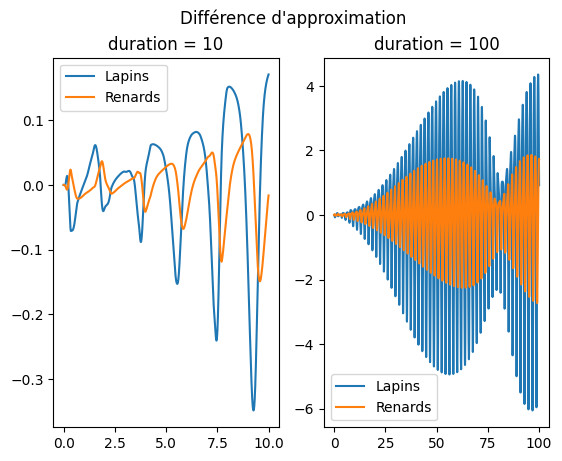

In [5]:
X1, Y1 = euler(F, G, 6, 2, duration1, precision1)
X2, Y2 = euler(F, G, 6, 2, duration2, precision2)

# On calcule les différences.
X_diff1, Y_diff1 = solution_RK45_1[:, 0] - X1, solution_RK45_1[:, 1] - Y1
X_diff2, Y_diff2 = solution_RK45_2[:, 0] - X2, solution_RK45_2[:, 1] - Y2

fig, axs = plt.subplots(1,2)

# On affiche les résultats.
axs[0].plot(T1, X_diff1, label="Lapins")
axs[0].plot(T1, Y_diff1, label="Renards")
axs[0].legend()
axs[0].set_title("duration = 10")

axs[1].plot(T2, X_diff2, label="Lapins")
axs[1].plot(T2, Y_diff2, label="Renards")
axs[1].legend()
axs[1].set_title("duration = 100")

fig.suptitle("Différence d'approximation")
plt.show()

La comparaison est assez hasardeuse : On compare deux approximations entre elles, et non une approximation avec une solution exacte. On remarque effectivement dans le deuxième cas que l'amplitude de l'erreur peux aller jusqu'à être environ aussi large que plage de valeurs prises par la fonction dans les deux approximations, ce qui indique plus un décalage dû une à une précision pas asse importante face à la fréquence d'oscillations.

En conclusion, cela n'apporte pas grand chose, mais les graphiques étant jolis, nous les laissons.

Continuons notre aventure... !

## Portrait de phase

Nous allons tracer un portrait de phase du système. Cela nous donne une idée des cycles d'évolution des populations de lapins et de renards.

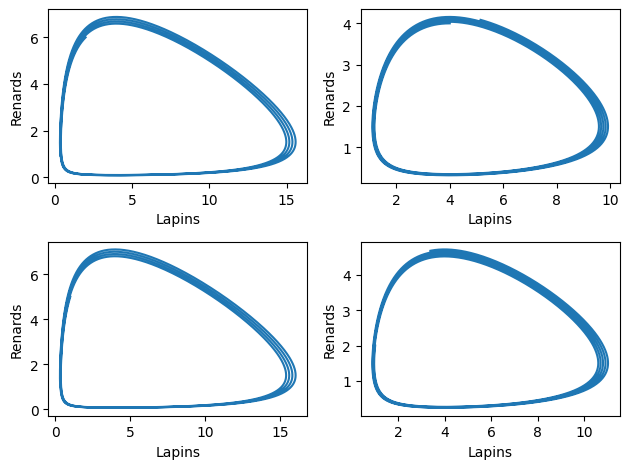

In [6]:
import random

fig, ax = plt.subplots(2,2)

for i, j in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    # On fait les axes pour chaque graphique.
    ax[i, j].set_xlabel("Lapins")
    ax[i, j].set_ylabel("Renards")

    # On prend des conditions initiales générées aléatoirement.
    rand1, rand2 = random.randint(1, 6), random.randint(1, 6)
    X, Y = euler(F, G, rand1, rand2, duration1, precision1)
    ax[i, j].plot(X, Y)

fig.tight_layout() # Pour que l'affichage soit plus agréable.

Les courbes sont trop rapprochées donc on ne voit pas vraiment le "flot de la courbe". Il ne faut pas croire que ce sont des surfaces ! 

Le problème de tels tracés est qu'il est sujet aux conditions initiales. Nous ne pouvons pas avoir une idée globale de l'évolution du système. En utilisant un `quiver` notre problème va être réglé.

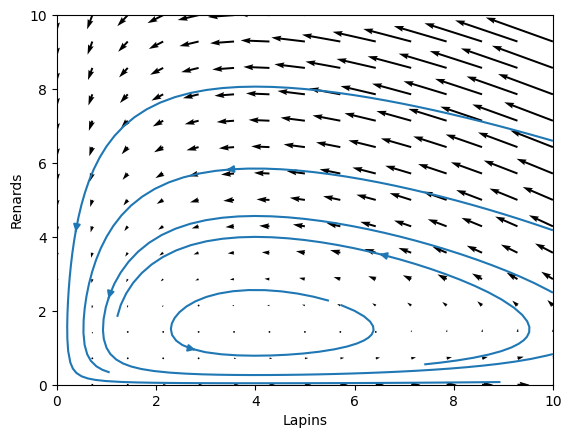

In [7]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("Lapins")
ax.set_ylabel("Renards")

size = 10
nb_pts = 15

msh_pts = np.linspace(0, size, nb_pts)
X, Y = np.meshgrid(msh_pts, msh_pts)

# Champs de vitesse à l'instant initial.
dX, dY = F(0, X, Y), G(0, X, Y)

ax.quiver(X, Y, dX, dY)
conditions_initiales = [
    (1,1),
    (1,4),
    (4,4),
    (6,2),
    (5,8) ]

ax.streamplot(X,Y, dX, dY, start_points=conditions_initiales)

plt.show()

En chaque point du graphique, on va obtenir une flèche qui va pointer dans la direction suivant le cours de l'évolution du système. On remarque qu'il semble exister un point (en coordonnées environ `(4, 1.5)`) qui correspond à un point d'équilibre. Comment le déterminer ? On suppose que ce point peut-être perçu comme la moyenne des oscillations de chaque entité. Ce que l'on va voir dans la partie suivante.

## Modèle proie-prédateur à croissance logistique

On va tracer l'évolution du portrait de phase en fonction de $K$. (Ne pas hésiter à lancer le code ci-dessous sur votre ordinateur, en dehors de JuPyter. Il génère une animation.)

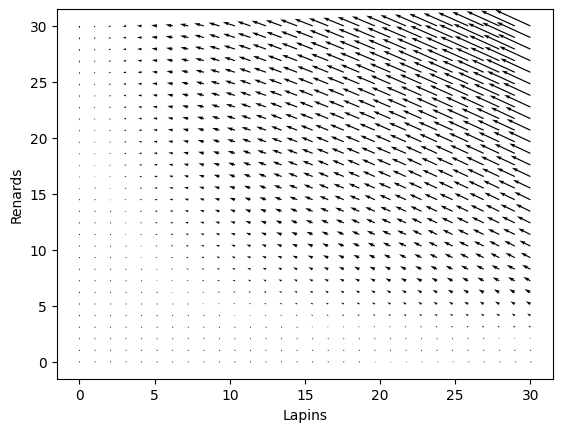

In [20]:
from matplotlib.animation import FuncAnimation
%matplotlib inline

fig, ax = plt.subplots(1,1)
ax.set_xlabel("Lapins")
ax.set_ylabel("Renards")

def F_capacite_biotique(k):
    return (lambda t, x, y: x * (3 * (1 - x / k) - 2 * y))

size = 30
precision = 30

msh_pts = np.linspace(0, size, precision)
X,Y = np.meshgrid(msh_pts, msh_pts)

K = np.linspace(0, 100, 1000)

dY = G(0, X, Y)
dX = F(0, X, Y)

Q = ax.quiver(X,Y, dX,dY)

def update(num, Q, X,Y):

    ax.set_title("K = {}".format(num))
    dX = (F_capacite_biotique(K[num]))(0,X,Y)
    
    Q.set_UVC(dX,dY)
    
    return Q,

# On trace le portrait de phase pour des valeurs de K de 0 à 1000.
anim = FuncAnimation(fig, update, fargs=(Q, X, Y), interval=100, blit=False, repeat=False, save_count=1000)

plt.show()

On remarque que pour de petites valeurs de $K$ la population de renard a tendance à prédominer. Au fur et à mesure que $K$ augmente, les lapins s'imposent. Ce qui semble logique dans la mesure où $K$ représente la *valeur maximale que peut atteindre une certaine population dans un habitat donné*.

On peut également s'intéresser aux graphes de la population de lapins et de renards pour différentes valeurs de $K$.

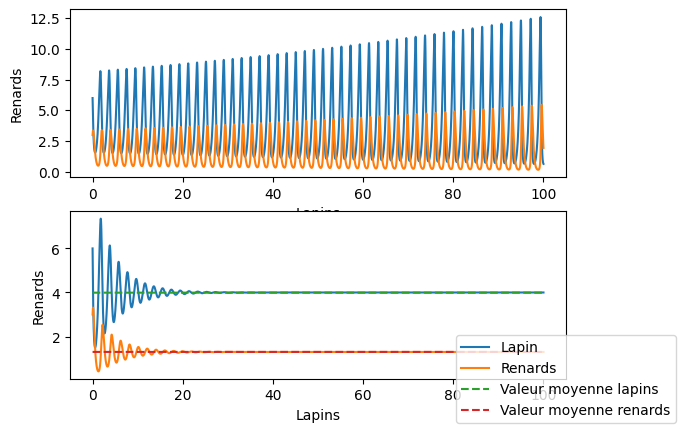

In [18]:
fig, ax = plt.subplots(2)
for i in range(2):
    ax[i].set_xlabel("Lapins")
    ax[i].set_ylabel("Renards")


X, Y = euler(F, G, 6, 3, duration2, precision2)
# On fixe une capacité biotique de trente par exemple.
X_cap_biot, Y_cap_biot = euler(F_capacite_biotique(30), G, 6, 3, duration2, precision2)

ax[0].plot(T2, X, label="Lapins")
ax[0].plot(T2, Y, label="Renards")

ax[1].plot(T2, X_cap_biot, label="Lapin")
ax[1].plot(T2, Y_cap_biot, label="Renards")

# On trace la moyenne des valeurs.
ax[1].plot(T2, np.mean(X_cap_biot)*np.ones(len(T2)), '--', label="Valeur moyenne lapins")
ax[1].plot(T2, np.mean(Y_cap_biot)*np.ones(len(T2)), '--', label="Valeur moyenne renards")

plt.legend(bbox_to_anchor=(1, 0), loc='center')

plt.show()

On retrouve bien les valeurs `(4, 1.5)` conjecturées précédemment. Il semblerait donc que ce soit la moyenne des oscillations. Regardons si nous obtenons la même solution pour d'autres valeurs de $K$.

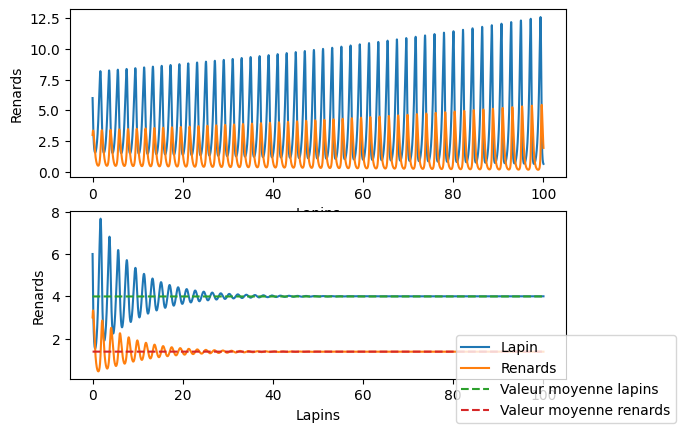

In [19]:
fig, ax = plt.subplots(2)
for i in range(2):
    ax[i].set_xlabel("Lapins")
    ax[i].set_ylabel("Renards")


X, Y = euler(F, G, 6, 3, duration2, precision2)
# On fixe une capacité biotique de cinquante par exemple.
X_cap_biot, Y_cap_biot = euler(F_capacite_biotique(50), G, 6, 3, duration2, precision2)

ax[0].plot(T2, X, label="Lapins")
ax[0].plot(T2, Y, label="Renards")

ax[1].plot(T2, X_cap_biot, label="Lapin")
ax[1].plot(T2, Y_cap_biot, label="Renards")

# On trace la moyenne des valeurs.
ax[1].plot(T2, np.mean(X_cap_biot)*np.ones(len(T2)), '--', label="Valeur moyenne lapins")
ax[1].plot(T2, np.mean(Y_cap_biot)*np.ones(len(T2)), '--', label="Valeur moyenne renards")

plt.legend(bbox_to_anchor=(1, 0), loc='center')

plt.show()

Nous trouvons les mêmes valeurs !

## Poule, Renard, Vipère !

Jusqu'à présent, nous nous sommes restreints à deux groupes d'acteurs : une population de renards ainsi qu'une population de lapin. Comment faire en présence de plus de deux espèces qui interagissent entre elles ?

On généralise assez naturellement le système d'initialement deux équations en un système à $n$ équations comme suit :
\begin{equation}
\frac{\mathrm{d} x_i(t)}{\mathrm{d}t} = x_i(t) \Big( \beta_i - \sum_{1 \leq j \leq n, \\ \text{ } \text{ } \text{ } i \neq j} \alpha_{i,j} x_j(t) \Big) \text{ pour tout $i \in [1, n]$}.
\end{equation}

En particulier, pour trois espèces on obtient le système suivant :
\begin{equation}
\begin{cases}
    \dot{x_1}(t) = x_1(t) \Big(\beta_1 - \alpha_{1, 2} x_2(t) - \alpha_{1, 3} x_3(t) \Big) \\
    \dot{x_2}(t) = x_2(t) \Big(\beta_2 - \alpha_{2, 1} x_1(t) - \alpha_{2, 3} x_3(t) \Big) \\
    \dot{x_3}(t) = x_3(t) \Big(\beta_3 - \alpha_{3, 1} x_1(t) - \alpha_{3, 2} x_2(t) \Big) \
\end{cases}
\end{equation}
avec des coefficients $\alpha_i$ et $\beta_i$ qui décrivent les interactions entre les trois espèces ou au sein même des espèces. On comprend déjà intuitivement que les paramètres $\beta_i$ sont propre à chaque espèce (en effet, ils ne sont liés qu'à de $x_i(t)$). En fonction de son signe, $\beta_i$ va désigner un taux de naissance ($\beta_i > 0$) ou un taux de mortalité ($\beta_i < 0$). Ensuite, les paramètres $\alpha_{i, j}$ vont représenter l'influence d'une espèce $j$ sur une espèce $i$.  
(Nous avons décidé de négliger l'influence que peut avoir une espèce sur elle-même, mis à part (en un certain sens) son taux de naissance ou mortalité.)

Dans le système Poule, Renard, Vipère nous avons les interactions suivantes : 
> - la **Poule** ($x_1$) attaque la Vipère ($x_2$) et se fait manger par le Renard ($x_3$),
> - la **Vipère** ($x_2$) attaque le Renard ($x_3$) et se fait manger par la Poule ($x_1$), et 
> - le **Renard** ($x_3$) attaque la Poule ($x_1$) et se fait manger par la vipère ($x_2$).

En conséquence, le système devient : 
\begin{equation}
\begin{cases}
    \dot{x_1}(t) = x_1(t) \Big(\beta_1 - \alpha_{1, 3} x_3(t) \Big) \\
    \dot{x_2}(t) = x_2(t) \Big(\beta_2 - \alpha_{2, 1} x_1(t) \Big) \\
    \dot{x_3}(t) = x_3(t) \Big(\beta_3 - \alpha_{3, 2} x_2(t) \Big) \
\end{cases}
\end{equation}

On a alors (en fixant arbitrairement les paramètres $\beta_i$ et $\alpha_{i, j}$) : 

In [11]:
def X1(t, X1, X2, X3):
    beta_1 = 1
    alpha_13 = 1
    return X1 * (beta_1 - alpha_13 * X3)

def X2(t, X1, X2, X3):
    beta_2 = 1
    alpha_21 = 1
    return X2 * (beta_2 - alpha_21 * X1)

def X3(t, X1, X2, X3):
    beta_3 = 1
    alpha_32 = 1
    return X3 * (beta_3 - alpha_32 * X3)

Il faut alors légèrement modifier le schéma d'Euler (mais le principe de fonctionnement présenté reste le même) :

In [12]:
def euler_3(X1, X2, X3, x10, x20, x30, duration, n_step):
    # On définit la taille du pas.
    step = duration / n_step
    
    # Conditions initiales
    X1_sol = [x10]
    X2_sol = [x20]
    X3_sol = [x30]
    
    t = 0
    for i in range(n_step):
        X1_sol = np.append(X1_sol, X1_sol[i] + X1(t, X1_sol[i], X2_sol[i], X3_sol[i]) * step)
        X2_sol = np.append(X2_sol, X2_sol[i] + X2(t, X1_sol[i], X2_sol[i], X3_sol[i]) * step)
        X3_sol = np.append(X3_sol, X3_sol[i] + X3(t, X1_sol[i], X2_sol[i], X3_sol[i]) * step)
        t += step
    
    return X1_sol, X2_sol, X3_sol

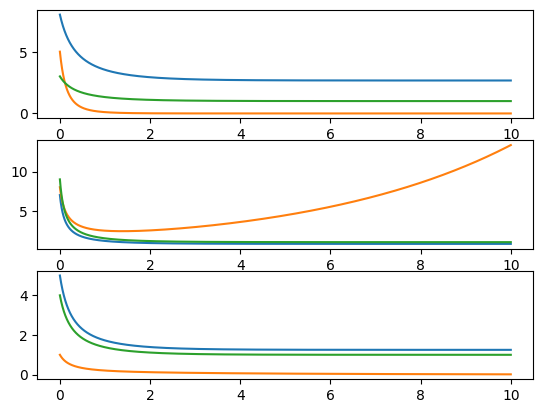

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3)

# On utilise duration et precision pour définir la taille du pas d'approximation.
duration = 10
precision = 10000

T = np.linspace(0, duration, precision + 1)

# On définit une fonction afin de pouvoir afficher la solution du problème pour différentes conditions initiales.
def resoudre(x10, x20, x30, i):
    
    X, Y, Z = euler_3(X1, X2, X3, x10, x20, x30, duration, precision)
    
    axs[i].plot(T, X)
    axs[i].plot(T, Y)
    axs[i].plot(T, Z)

# Trois exemples avec différentes conditions initiales.
resoudre(8, 5, 3, 0)
resoudre(7, 8, 9, 1)
resoudre(5, 1, 4, 2)

Nous pouvons remarqué trois comportements différents : 
> - le premier graphique montre une brève interaction entre deux espèces puis un équilibre.
> - le deuxième graphique montre qu'une espèce va prédominer sur les deux autres.
> - le troisième graphique montre un équilibre sans réelle interaction entre les espèces.

Nous avons sans doute négliger trop d'interactions ou bien, en présence de "beaucoup" de variables, il est difficile de trouver des situations qui ne s'équilibrent pas rapidement. Ou plus simplement, le modèle proie-prédateur n'est peut être pas bien adapté.

## Le cas des manuscrits